### OFDM on SDRs

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.signal as signal
import commpy.filters as filters
from ece230b import *

%matplotlib inline

[-0.70710678+0.70710678j  0.70710678-0.70710678j -0.70710678-0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j  0.70710678+0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j  0.70710678-0.70710678j]


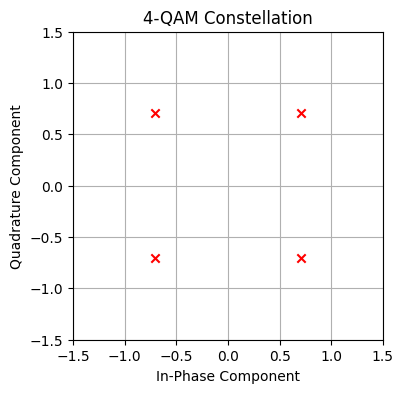

In [79]:
# Generate random 4-QAM symbols
N = 1000
M = 4
s_freq, constellation = gen_rand_qam_symbols(N, M)
# s_freq = np.concatenate((np.ones(100, dtype=complex), s_freq, np.zeros(100, dtype=complex)))
print(s_freq[-10:-1])

plt.figure(figsize=(4, 4))
plt.scatter(constellation.real, constellation.imag, c='red', marker='x')
plt.title(f"{M}-QAM Constellation")
plt.xlabel("In-Phase Component")
plt.ylabel("Quadrature Component")
plt.grid(True)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [80]:
# communication system parameters
fs = 1e6     # baseband sampling rate (samples per second)
ts = 1 / fs  # baseband sampling period (seconds per sample)
sps = 10     # frequency-domain samples per OFDM symbol
T = ts * sps # time between OFDM symbols (seconds per symbol)

In [81]:
# serial-to-parallel conversion (frequency domain)
N_carriers = 16+1
s_freq_parallel = [s_freq[i*N_carriers:(i*N_carriers+N_carriers if (i+N_carriers<len(s_freq)) else len(s_freq))] for i in range((len(s_freq)+N_carriers-1)//N_carriers)]
# print(len(symbols_freq_parallel))
# print(len(symbols_freq)/N_carriers)
# print(symbols_freq_parallel[-1])

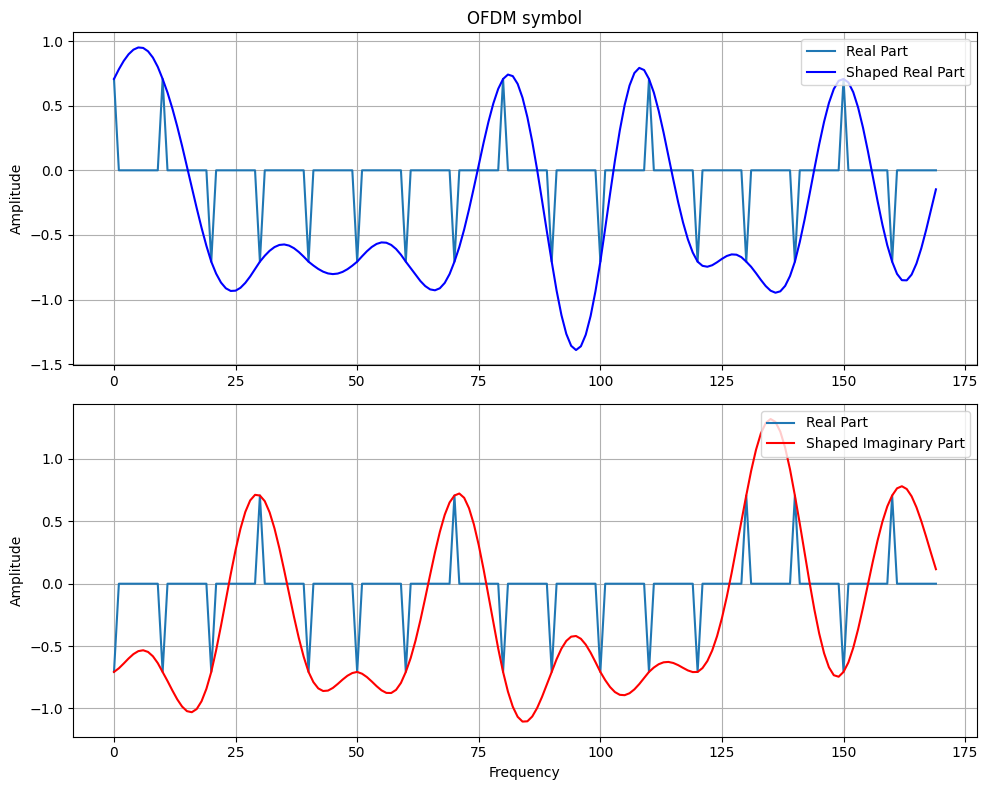

In [83]:
# shape frequency domain with sinc pulse
f_div, sinc_pulse = get_rc_pulse(0, N_carriers-1, sps)
s_freq_train = [create_pulse_train(s_freq_parallel[i], sps)[1] for i in range(len(s_freq_parallel))]
s_freq_shaped = [np.convolve(s_freq_train[i], sinc_pulse, mode='same') for i in range(len(s_freq_train))]

# Visualize shaped OFDM symbol
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.title("OFDM symbol")
plt.plot(np.real(s_freq_train[0]), label='Real Part')
plt.plot(np.real(s_freq_shaped[0]), label='Shaped Real Part', color='blue')
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend(loc='upper right')
plt.subplot(2, 1, 2)
plt.plot(np.imag(s_freq_train[0]), label='Real Part')
plt.plot(np.imag(s_freq_shaped[0]), label='Shaped Imaginary Part', color='red')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()